# Housing Price Prediction using ML Regularization and Lasso Assignment


## Problem Statement

### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### The company wants to know:

###    Which variables are significant in predicting the price of a house, and

###    How well those variables describe the price of a house.

 

In [122]:
#Import all the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn import metrics

import os 

import warnings
warnings.filterwarnings('ignore')

In [123]:
#Reading the dataset
df = pd.read_csv("train.csv")

print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [124]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [125]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data analysis and EDA

In [126]:
df.shape

(1460, 81)

In [127]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [128]:
# Consider only the numberic values and all the categorical values are not required 
# In Our dataset we only have numberic type of float64 and int64
df_num = df.select_dtypes(include=['float64', 'int64'])
df_cat = df.select_dtypes(include=['object'])
print("Numerical Values : ", df_num.columns)
print("Categorical Values : ", df_cat.columns)

Numerical Values :  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical Values :  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinT

# NULL value Treatment

# Remove the columns which has most missing value, as they are irrelavent for our model
# Fill all the NA with most common value in that column using mode


In [129]:
print(round(100*(df.isnull().sum()[df.isnull().sum()>0]/len(df.index)), 2))
print(df.isnull().sum()[df.isnull().sum()>0])

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [130]:
# Before doing any imputation, refer the data dictionary and fill the NA will appropriate value for features
# As per Data dictionary the meaning of NA is replaced to its meaning
df['Alley'].fillna('No Alley', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('No Fireplace', inplace=True)
df['PoolQC'].fillna('No Pool', inplace=True)
df['Fence'].fillna('No Fence', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['LotFrontage'].fillna(0, inplace=True) 
df['MiscFeature'].fillna('None', inplace=True) 

df['GarageType'].fillna('No Garage', inplace=True) 
df['GarageFinish'].fillna('No Garage', inplace=True) 
df['GarageQual'].fillna('No Garage', inplace=True) 
df['GarageCond'].fillna('No Garage', inplace=True) 

df['BsmtQual'].fillna('No Basement', inplace=True)
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinSF1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)

df['FireplaceQu'].fillna('No Fireplace', inplace=True)

# Year built will not help us to understand implication instead if we have the age of the building we can try to understand the 
# Price of build with its age.
df['YearBuilt'] = 2022 - df['YearBuilt']
df['YearRemodAdd'] = 2022 - df['YearRemodAdd']
df['GarageYrBlt'] = 2022 - df['GarageYrBlt']
df['YrSold'] = 2022 - df['YrSold']

In [131]:
round(100*(df.isnull().sum()[df.isnull().sum()>0]/len(df.index)), 2)

Electrical     0.07
GarageYrBlt    5.55
dtype: float64

In [132]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace=True)

In [133]:
round(100*(df.isnull().sum()[df.isnull().sum()>0]/len(df.index)), 2)

Series([], dtype: float64)

In [134]:
#ID is not needed for analysis, hence dropping 
df = df.drop(['Id'], axis = 1)

In [135]:
print(df_num.info())
print(df_cat.info())
print(round(100*(df.isnull().sum()[df.isnull().sum()>0]/len(df.index)), 2))
print(df.isnull().sum()[df.isnull().sum()>0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [136]:
correlation = df_num.corr()
correlation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


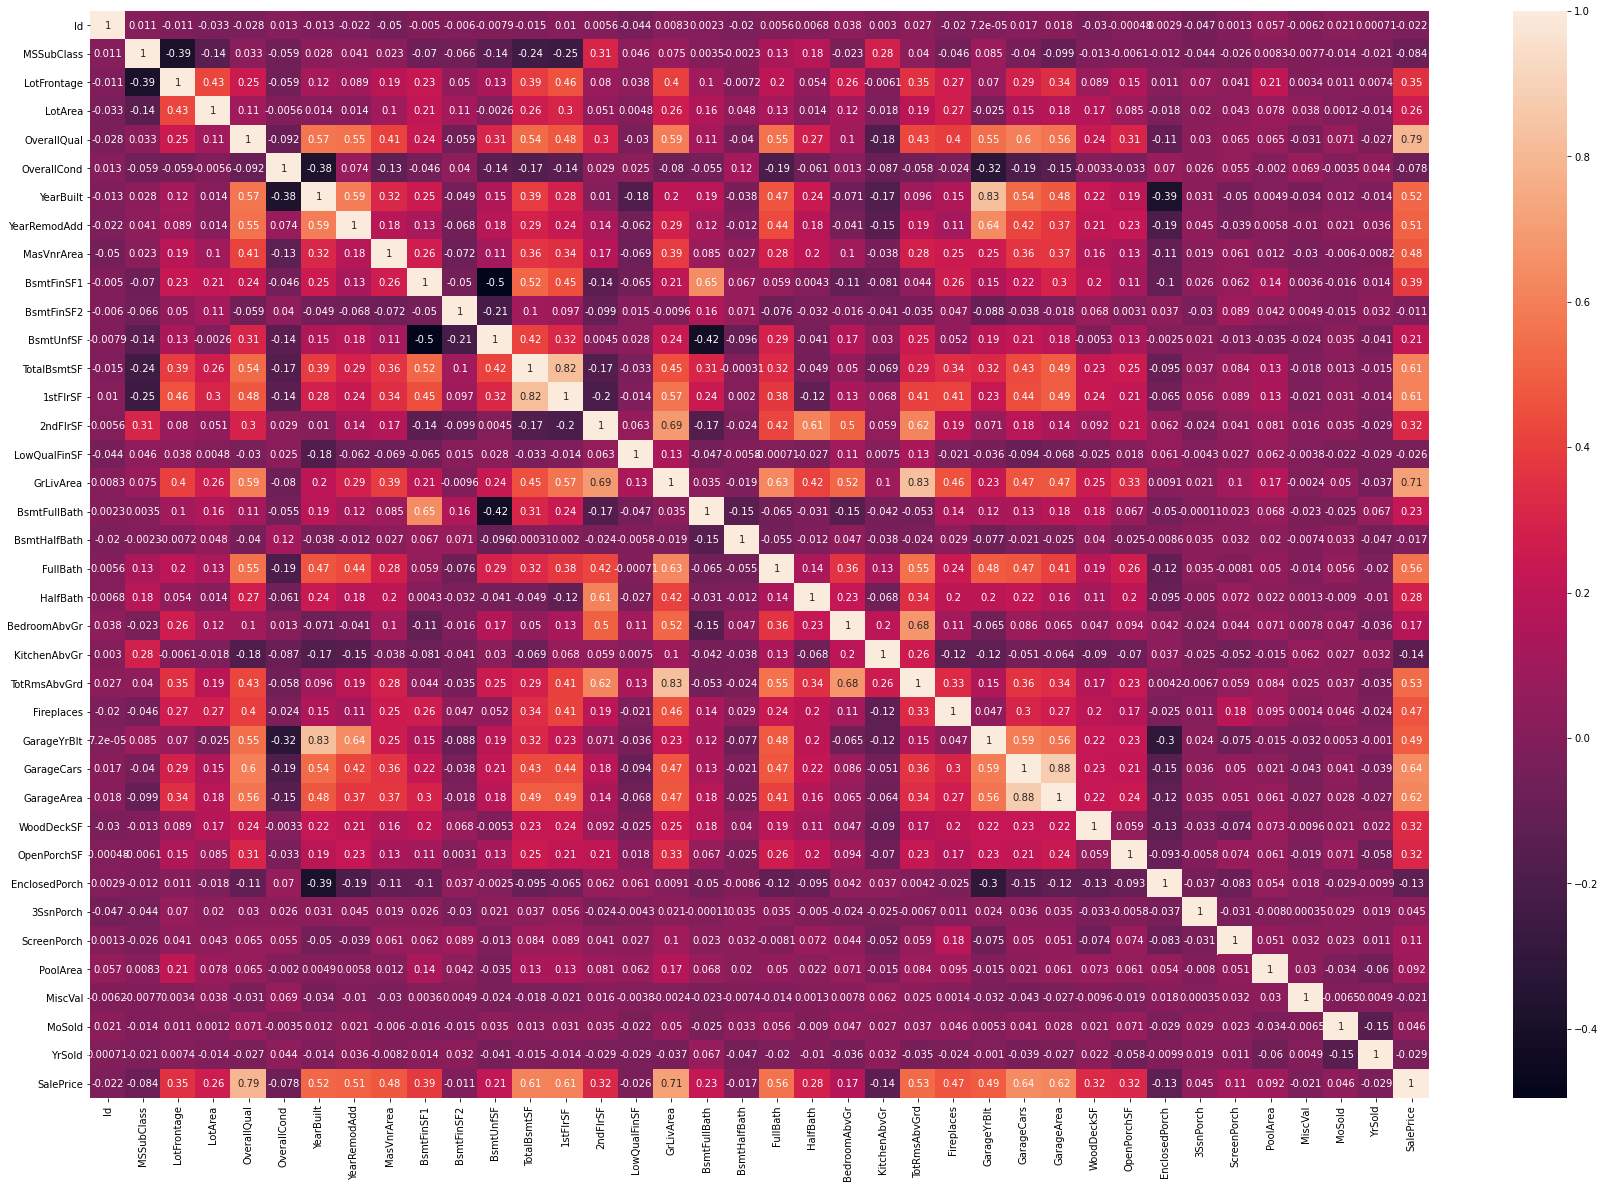

In [137]:
plt.figure(figsize=(30,20))
sns.heatmap(correlation, annot=True)
plt.show()

# Notes:
 * Some features have very highly correlated

 * GarageArea and Garagecasrs with 0.88
 * GarageYrBlt and YearBuilt with 0.83
 * TotalBsmntSF and 1stFlrSF with 0.82
 * TotRmsAbvGrd and GrLivArea with 0.83

# Notes:
 *     After splitting the DataFrame we see 25 Numerical and 55 categorical variables are there

# OUTLIERS Treatment
* On the Numerical data we have to check for any outliers 

#After imputing min and max check anything is missed
outliers_percentage = {}
for feature in df_num.columns:
    IQR = df_num[feature].quantile(.75) - df_num[feature].quantile(.25)
    outliers_count = df_num[(df_num[feature] > (df_num[feature].quantile(.75) + 1.5 * IQR)) | 
                            (df_num[feature] < (df_num[feature].quantile(.25) - 1.5 * IQR))].shape[0]
                            
    outliers_percentage[feature] = round(outliers_count/df_num.shape[0]*100,2)
outlier_df = pd.DataFrame({'Features': list(outliers_percentage.keys()),'Percentage': list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

# Except the target variable remove all the outliers with MIN and MAX whisker
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = df_num[feature].quantile(.75) - df_num[feature].quantile(.25) 
        max_value = df_num[feature].quantile(.75)+1.5*IQR
        min_value = df_num[feature].quantile(.25)-1.5*IQR
        df_num[feature][df_num[feature] > max_value] = max_value
        df_num[feature][df_num[feature] < min_value ] = min_value



outliers_percentage = {}
for feature in df_num.columns:
    IQR = df_num[feature].quantile(.75) - df_num[feature].quantile(.25)
    outliers_count = df_num[(df_num[feature] > (df_num[feature].quantile(.75) + 1.5 * IQR)) | 
                            (df_num[feature] < (df_num[feature].quantile(.25) - 1.5 * IQR))].shape[0]
                            
    outliers_percentage[feature] = round(outliers_count/df_num.shape[0]*100,2)
outlier_df = pd.DataFrame({'Features': list(outliers_percentage.keys()),'Percentage': list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

Comment

    Most of the numberic features have outlier
    Dropping all outliers will cause loss of information
    Instead of dropping we can impute the values with fixed minimum and maximum values for outliers for 25th percentile and 75th percentile



fig = plt.subplots(figsize=(30,150))
df_num.columns
for i,feature in enumerate(df_num.columns):
    if feature!='SalePrice':
        plt.subplot(df_num.shape[1],3,i+1)
        plt.subplots_adjust(hspace=4.0)
        sns.boxplot(y = feature, palette='Set3', data = df_num)
        plt.tight_layout()

# Notes: 

* No outlier is present
* Succesfully removed the outliers otherthan target value

In [138]:
#Some of the numberic values have same value more than 90% so they can be removed

#Step1 : Drop from df_num dataset
df_num = df_num.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea', 'MiscVal'], axis=1)
df_num = df_num.drop(['Id'], axis=1)

In [139]:
#Some of the numberic values are the actually represents the categorical variable, so convert the type to category

#Step1 : Drop from df_num dataset
df_num.drop(['MSSubClass','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces','GarageCars'], axis=1, inplace=True)

#step2: Change the type to object in the original set
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')

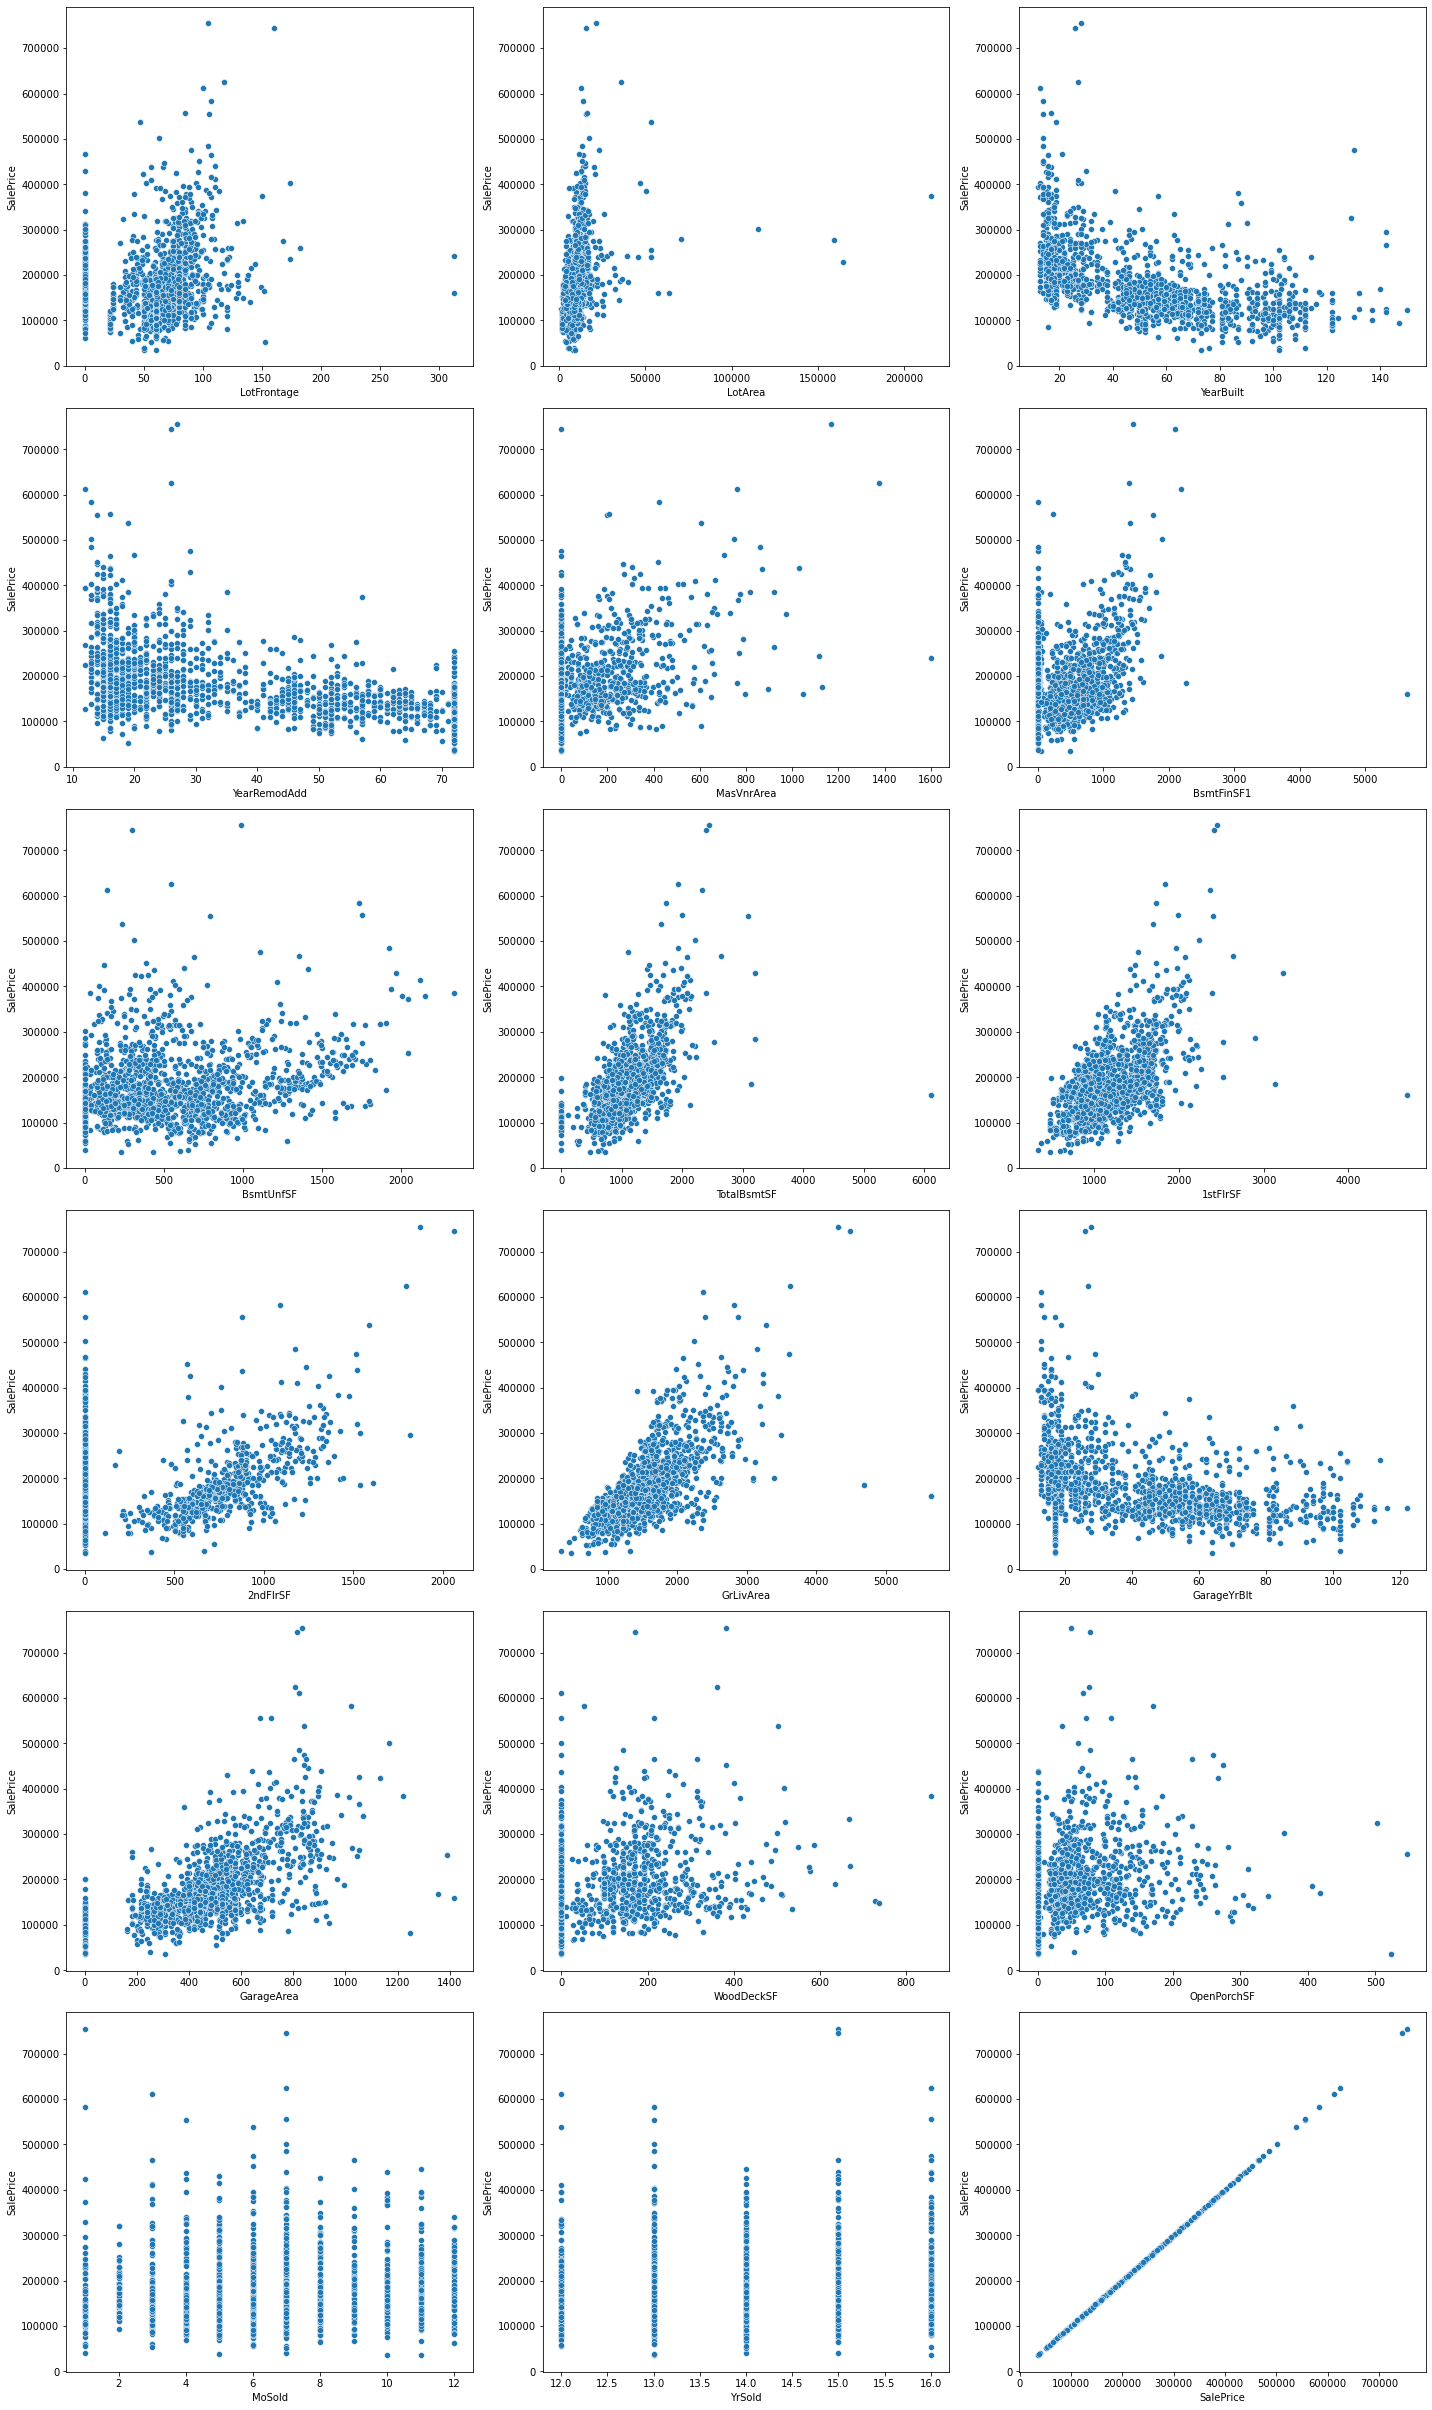

In [140]:
fig = plt.subplots(figsize=(20,100))
df_num.columns
for i,feature in enumerate(df_num.columns):
    plt.subplot(df_num.shape[1],3,i+1)
    plt.subplots_adjust(hspace=4.0)
    sns.scatterplot(df[feature], df['SalePrice'])
    plt.tight_layout()

# Notes: 

* GarageArea and GrlivArea are showing very positive relation with Saleprice
* 'poolArea', MiscVal, ScreenPorch, LowQualFinSF values are not have impact on the Sale price so we can drop them as they will not  be useful

In [141]:
print(df_num.shape[1])

18


# In the given Dataset some of the the variables are numberic but they are descrete values to represent the categorical value

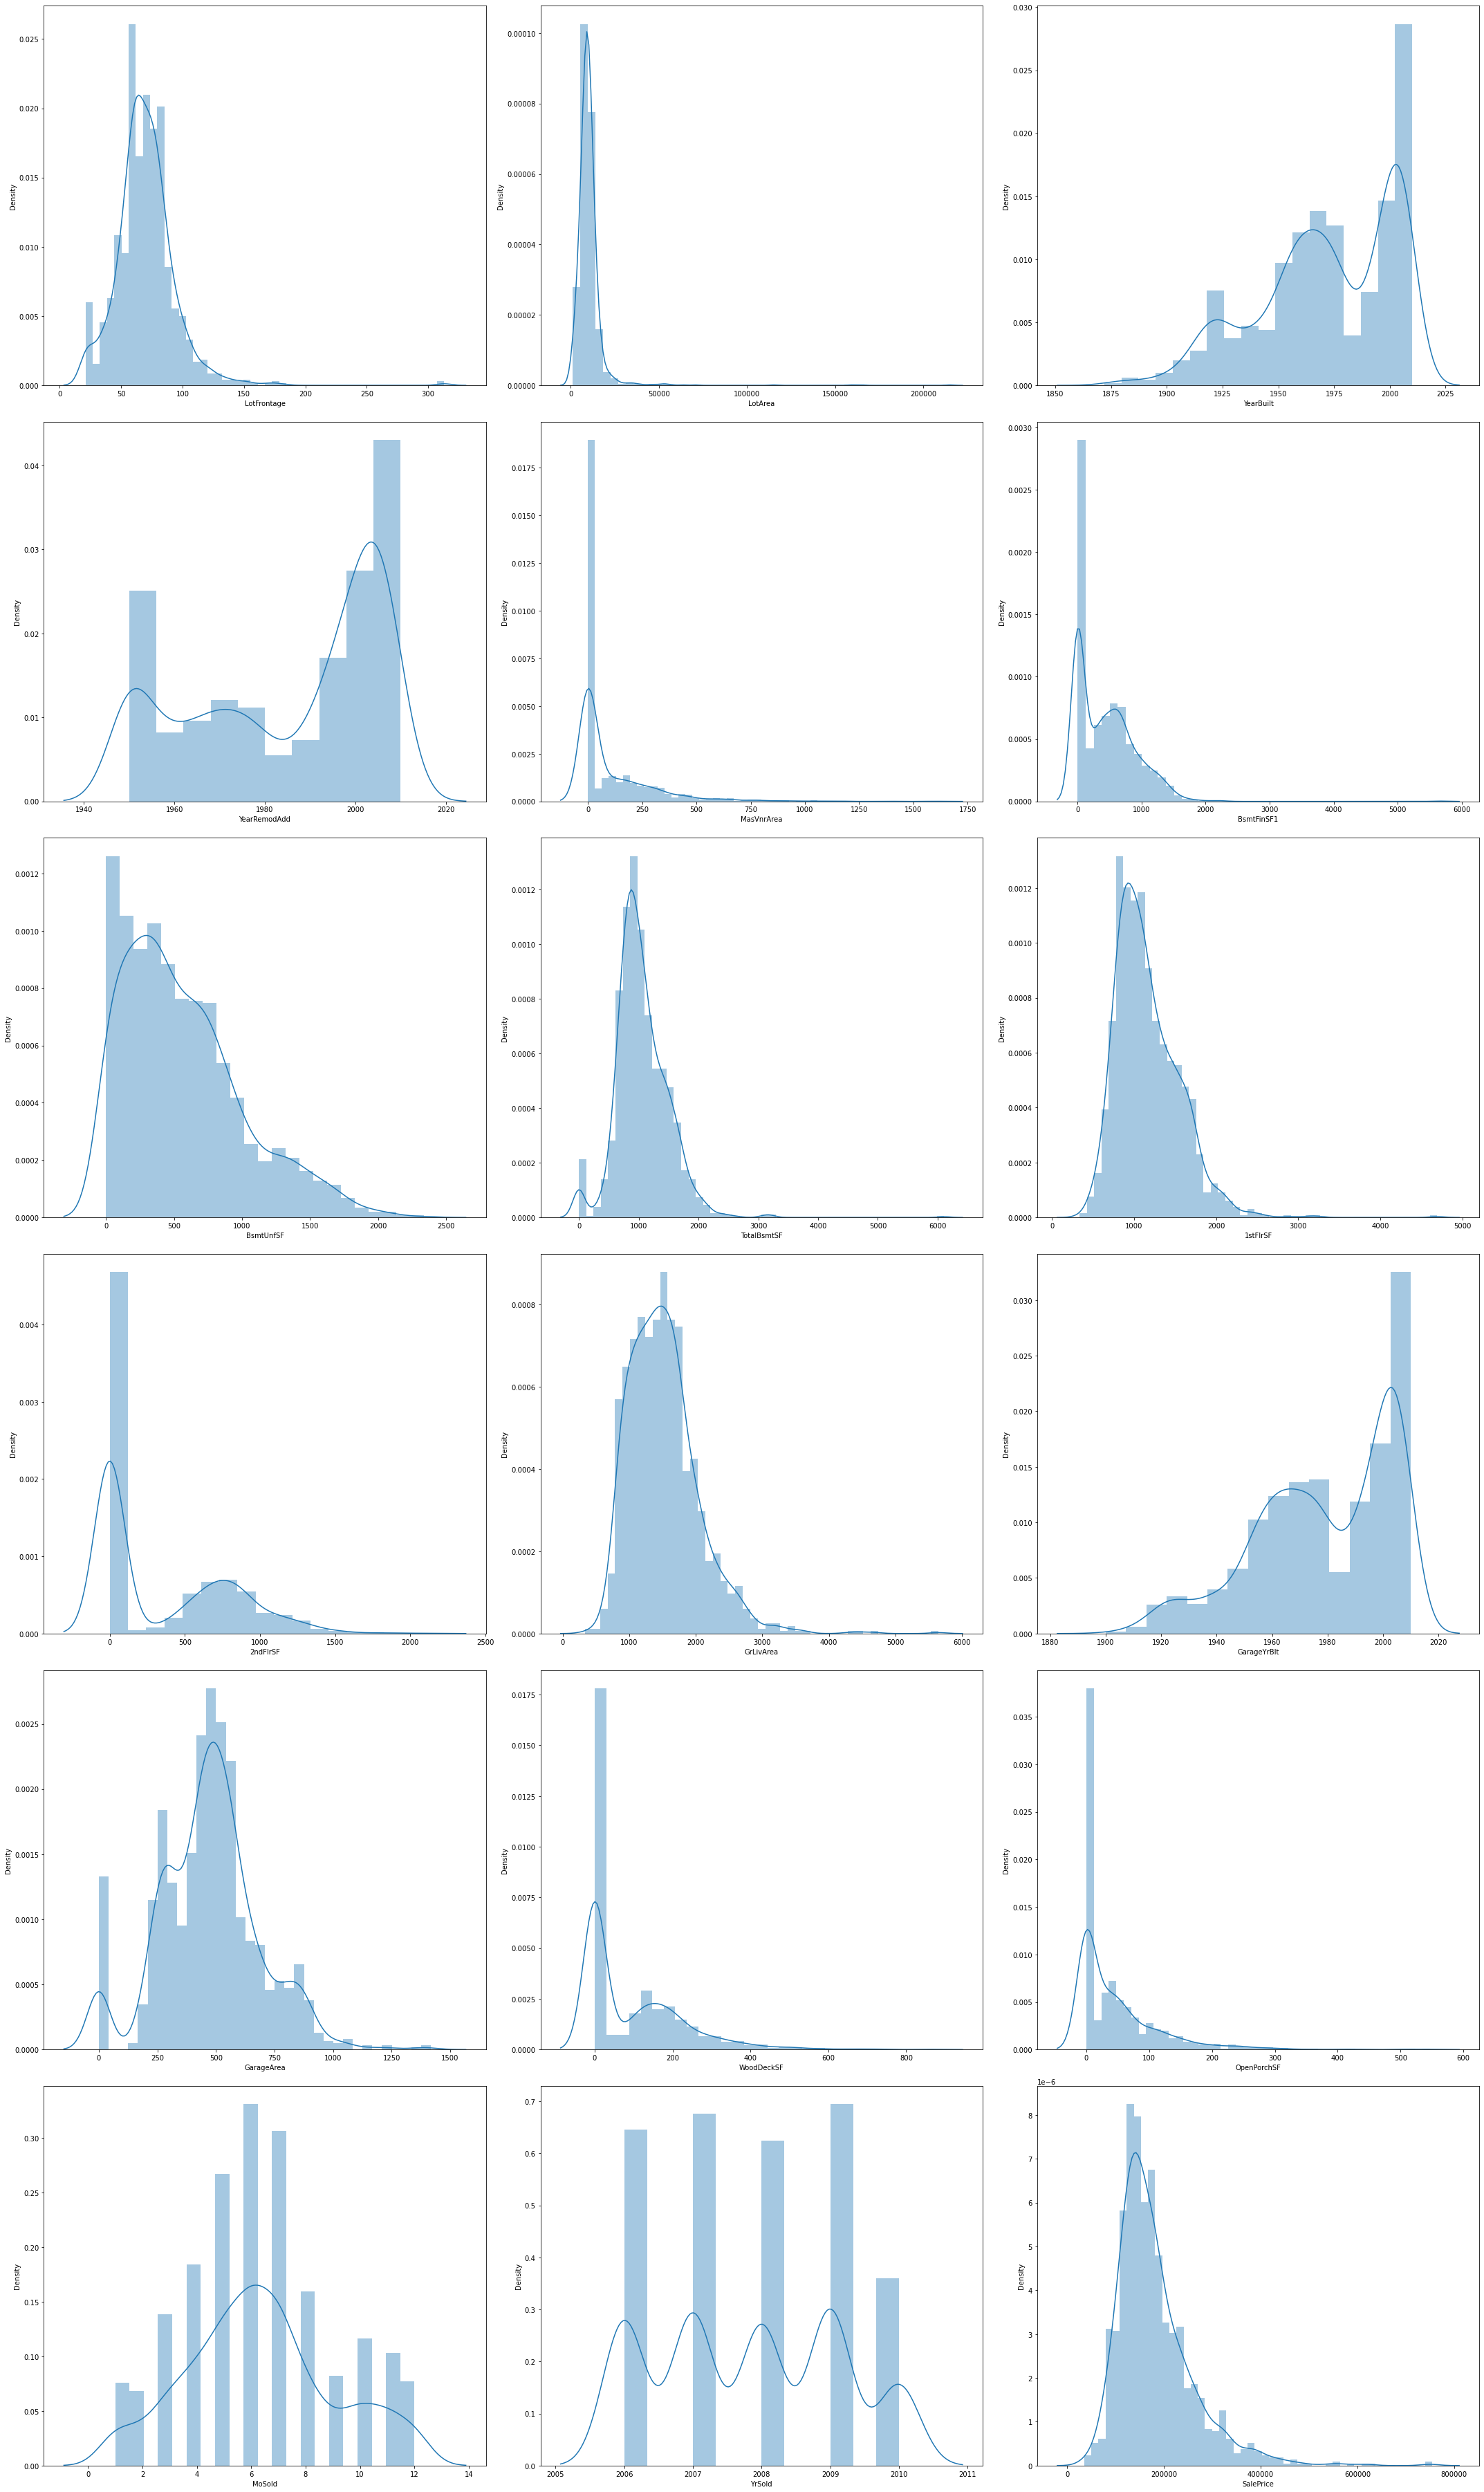

In [142]:
fig = plt.subplots(figsize=(30,150))
df_num.columns
for i,feature in enumerate(df_num.columns):
    plt.subplot(df_num.shape[1],3,i+1)
    plt.subplots_adjust(hspace=4.0)
    sns.distplot(df_num[feature])
    plt.tight_layout()

# Notes:

* As shown in the graph, some of the features are kept constant, so we can remove those feature from our analysis

# Check for Duplicate 

In [143]:
# Check for the dupllicate value
df[df.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


# Note:

* There are no duplicate value present it the dataset

In [144]:
df.shape

(1460, 80)

# Dummy Variable

In [145]:
df['Utilities'] = df['Utilities'].apply(lambda x: 1 if x == 'AllPub' else 0)
print(df['Utilities'].unique())

[1 0]


In [146]:
df['Street'] = df['Street'].apply(lambda x: 1 if x == 'Pave' else 0)
print(df['Street'].unique())

[1 0]


In [147]:
df['CentralAir'] = df['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)
print(df['CentralAir'].unique())

[1 0]


In [148]:
#Creating the categorical variable dataframe to create the dummy variable 
categorical_vars = df.select_dtypes(include=['object'])

In [149]:
df_dummies = pd.get_dummies(categorical_vars, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [308]:
# We need to replace the actuall categorical variable with newly created dummy variables


# Step 1: Remove the categorical variable
final = df.drop(list(categorical_vars.columns), axis=1)

# Step 2: Add the dummy variables by concatinating
final = pd.concat([final, df_dummies], axis=1)

In [309]:
final.shape

(1460, 316)

In [310]:
final.describe()

,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,0.995890,0.999315,50.732192,37.134247,103.117123,443.639726,46.549315,567.240411,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,34.664304,9981.264932,0.063996,0.026171,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,0.000000,1300.000000,0.000000,0.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,7553.500000,1.000000,1.000000,22.000000,18.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,63.000000,9478.500000,1.000000,1.000000,49.000000,28.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,11601.500000,1.000000,1.000000,68.000000,55.000000,164.250000,712.250000,0.000000,808.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,1.000000,1.000000,150.000000,72.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [311]:
    test = final.tail(460)
test.shape

(460, 316)

# Model Building and Evaluaion


In [312]:
from sklearn.preprocessing import scale
X = final.head(1000)
y = np.log(X.SalePrice)
X = X.drop(['SalePrice'], axis=1)
test = test.drop("SalePrice",1)               

In [313]:
X = X.fillna(X.interpolate())

test = test.fillna(test.interpolate())

In [ ]:
# RFE
from sklearn.preprocessing import scale

X = final.drop(['SalePrice'], axis=1)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

plt.title('Distribution of SalePrice')
sns.distplot(final['SalePrice'])
plt.show()

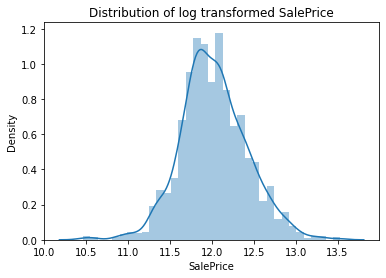

In [315]:
# The SlaePrice is highly right skewed, checking the distribution of transformed SalePrice

sns.distplot(np.log(final['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()


In [316]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [317]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test)

StandardScaler()

In [318]:
print(X.shape)
print(y.shape)


(1000, 315)
(1000,)


In [319]:
#Split the Dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Model Building and Evaluaion

## Linear Regression
* Lets now try to predict car prices, a dataset using linear regression


In [320]:
#Instanciate
lm = LinearRegression()

#Fit the line
lm.fit(X_train, y_train)

LinearRegression()

In [321]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 315)
(300, 315)
(700,)
(300,)


In [386]:
#running RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
col

#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df


,Variable,rfe_support,rfe_ranking
0,OverallQual_2,True,1
1,OverallQual_3,True,1
2,OverallQual_4,True,1
3,OverallQual_5,True,1
4,OverallQual_7,True,1
5,OverallQual_8,True,1
6,OverallQual_9,True,1
7,OverallQual_10,True,1
8,OverallCond_2,True,1
9,OverallCond_3,True,1


In [384]:
print(lm.intercept_)
print(lm.coef_)

10.826584010318712
[ 5.79862516e-06  1.71914139e-06  1.41120050e-01  3.81028681e-01
 -1.64496492e-03 -9.36619322e-04  2.25740141e-05  3.10315012e-05
  3.61836170e-05 -9.59598307e-06  5.76190034e-05  2.85894236e-02
  4.01551564e-05  2.38448425e-05  1.10069392e-04  1.74069719e-04
  3.41921516e-02 -9.22881606e-06  1.69280641e-04  1.23814427e-04
 -2.65640058e-05  9.12169414e-05  9.61296303e-05  2.71478943e-04
  6.89614727e-05 -6.65385559e-05 -2.05832587e-03  8.22951654e-03
 -3.22477008e-02 -2.01884850e-01 -3.70606497e-02  2.42811982e-02
 -6.67337284e-02  1.87174120e-02 -2.09277170e-01 -2.25162080e-01
 -1.04949350e-01 -2.68270676e-02 -3.47413513e-02 -8.27315662e-02
 -1.05948923e-01  5.71320743e-02  6.33722622e-01  5.54932738e-01
  6.18713504e-01  5.05962007e-01 -1.36209018e-02 -4.56532000e-02
  2.53678956e-02  1.91898559e-02  1.60851305e-02  2.88415964e-02
  7.48861850e-02  5.41232098e-02  3.01410689e-02 -1.55211603e-02
 -7.96777930e-02 -5.38177505e-03  6.21290198e-02 -2.51833502e-02
 -1.60

In [323]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9612717519378926
0.8365267920490512
4.629474057132429
7.335734905594897
0.0066135343673320406
0.024452449685316326


# Ridge Regression

In [324]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5

model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params, 
                       scoring = 'neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [325]:
ridge_cv_results = pd.DataFrame(model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,20,-0.075268,-0.099627,1
22,10.0,-0.070419,-0.099928,2
21,9.0,-0.069758,-0.100166,3
20,8.0,-0.069057,-0.100489,4
19,7.0,-0.068298,-0.100889,5
18,6.0,-0.067450,-0.101424,6
24,50,-0.082976,-0.101566,7
17,5.0,-0.066512,-0.102108,8
16,4.0,-0.065426,-0.103029,9
15,3.0,-0.064136,-0.104305,10


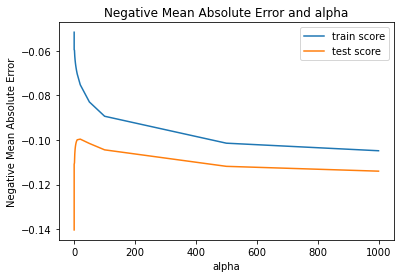

In [326]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [327]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.09962693743388656


In [328]:
alpha_val = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha_val)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.93459729e-04  1.87480982e-06  1.78565330e-02  3.96165812e-03
 -2.19613099e-03 -2.10368432e-03  1.47454897e-06  3.63944090e-05
  7.29100148e-05 -1.36118696e-05  9.56925542e-05  6.02175005e-02
  3.35586782e-05  4.39036628e-05  1.37849980e-04  2.15312320e-04
 -1.11069367e-03  5.13798065e-04  1.90751748e-04  1.65081848e-04
 -2.81345184e-05  1.73837497e-04  1.01153465e-04  4.17637065e-04
 -2.09584234e-05  5.74123463e-06 -2.85863077e-03  8.68479817e-03
 -3.16377089e-02 -3.59182623e-03  1.19398685e-02  1.05718100e-02
 -2.51332485e-02  2.74612506e-02  2.04913767e-02 -2.76834212e-03
 -5.40443632e-04 -1.90810211e-03 -4.99024356e-03 -3.73459695e-02
 -3.01014751e-03 -1.72344215e-03  3.78094944e-02  8.64341621e-03
  6.49695680e-02  9.71266157e-04 -1.80056996e-02 -9.61722955e-03
  2.09093915e-02  4.06398610e-03  8.81437244e-04  7.67546581e-03
  4.61268692e-03  1.04020561e-02  2.21381168e-02  1.40021110e-03
 -1.98481582e-03 -1.19842154e-02  1.45293542e-02 -1.89904843e-02
  0.00000000e+00 -3.59469

In [329]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.9242955453969484


In [330]:
#Lets calculate Some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9242955453969484
0.8824287584435963
9.049513627162934
5.2759193472133425
0.012927876610232763
0.017586397824044475


In [331]:
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params, 
                       scoring = 'neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [332]:
model_cv1 = GridSearchCV(estimator = lasso,
                       param_grid = params, 
                       scoring = 'r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv1.fit(X_train, y_train)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.081007,0.011913,0.003024,0.000256,0,{'alpha': 0.0001},-0.122202,-0.113005,-0.104145,-0.104613,...,-0.110678,0.006622,2,-0.054495,-0.056040,-0.060596,-0.060105,-0.054942,-0.057235,0.002597
1,0.012474,0.000831,0.002822,0.000364,0,{'alpha': 0.001},-0.105954,-0.103131,-0.089168,-0.087605,...,-0.096355,0.007300,1,-0.074437,-0.074738,-0.077623,-0.077926,-0.073983,-0.075741,0.001680
2,0.005373,0.000157,0.002494,0.000030,0,{'alpha': 0.01},-0.124210,-0.125143,-0.101787,-0.107772,...,-0.115695,0.009305,3,-0.107052,-0.103932,-0.111025,-0.110238,-0.105866,-0.107623,0.002663
3,0.015909,0.005463,0.002537,0.000076,0,{'alpha': 0.05},-0.125317,-0.127790,-0.102890,-0.109049,...,-0.117450,0.009736,9,-0.110207,-0.105997,-0.113690,-0.113100,-0.107867,-0.110172,0.002956
4,0.018489,0.004565,0.003004,0.000310,0,{'alpha': 0.1},-0.125233,-0.128180,-0.101883,-0.108776,...,-0.117226,0.010142,7,-0.110001,-0.106180,-0.113604,-0.113207,-0.107784,-0.110155,0.002921
5,0.014233,0.001977,0.002576,0.000067,0,{'alpha': 0.2},-0.123825,-0.127952,-0.101339,-0.109030,...,-0.116755,0.009964,6,-0.109664,-0.106545,-0.113905,-0.113868,-0.107903,-0.110377,0.003031
6,0.013244,0.003913,0.002584,0.000050,0,{'alpha': 0.3},-0.123064,-0.127452,-0.101161,-0.109692,...,-0.116468,0.009640,4,-0.109703,-0.107036,-0.114016,-0.114111,-0.108087,-0.110591,0.002960
7,0.012629,0.004427,0.002606,0.000047,0,{'alpha': 0.4},-0.122411,-0.127149,-0.101871,-0.110709,...,-0.116675,0.009145,5,-0.110171,-0.107577,-0.114410,-0.114441,-0.108736,-0.111067,0.002863
8,0.012400,0.005841,0.002828,0.000358,0,{'alpha': 0.5},-0.122163,-0.127029,-0.102907,-0.111698,...,-0.117260,0.008763,8,-0.110987,-0.108176,-0.115023,-0.115097,-0.109728,-0.111802,0.002805
9,0.014793,0.005081,0.003857,0.000703,0,{'alpha': 0.6},-0.122249,-0.127053,-0.104019,-0.113028,...,-0.118048,0.008425,10,-0.111783,-0.109128,-0.115773,-0.115952,-0.110818,-0.112691,0.002726


In [333]:
losso_cv_results = pd.DataFrame(model_cv.cv_results_)
losso_cv_results = losso_cv_results[losso_cv_results['param_alpha']<=1000]
losso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.001,-0.075741,-0.096355,1
0,0.0001,-0.057235,-0.110678,2
2,0.01,-0.107623,-0.115695,3
6,0.3,-0.110591,-0.116468,4
7,0.4,-0.111067,-0.116675,5
5,0.2,-0.110377,-0.116755,6
4,0.1,-0.110155,-0.117226,7
8,0.5,-0.111802,-0.117260,8
3,0.05,-0.110172,-0.117450,9
9,0.6,-0.112691,-0.118048,10


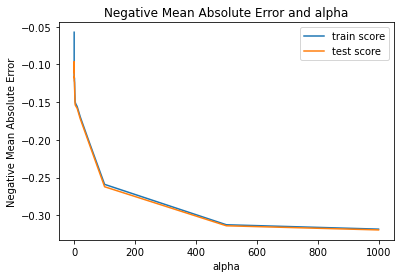

In [334]:
# plotting mean test and train scoes with alpha 

losso_cv_results['param_alpha'] = losso_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(losso_cv_results['param_alpha'], losso_cv_results['mean_train_score'])
plt.plot(losso_cv_results['param_alpha'], losso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [358]:
print(lasso.intercept_)
print(lasso.coef_)

11.007099330477615
(315,)


In [335]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.09635493849311284


In [336]:
alpha = model_cv.best_params_['alpha']
#alpha = 0.00001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [337]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.9224512552258687


In [338]:
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8807888785724864


In [339]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.017831692331572023


In [340]:
#Lets calculate Some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9224512552258687
0.8807888785724864
9.26997527797516
5.349507699471607
0.0132428218256788
0.017831692331572023


In [341]:
lr_table = {'Metric': ['R2_score (Train)', 'R2_score (Test)','RSS(Train)','RSS(Test)', 'MSE(Train)','MSE(Test)'],
           'Linear Regression': metric}
lr_metric= pd.DataFrame(lr_table, columns=['Metric', 'Linear Regression'])

rg_metric = pd.Series(metric2, name='Ridge  Regression')
ls_metric = pd.Series(metric3, name='Losso  Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis =1 )
final_metric


,Metric,Linear Regression,Ridge Regression,Losso Regression
0,R2_score (Train),0.961272,0.924296,0.922451
1,R2_score (Test),0.836527,0.882429,0.880789
2,RSS(Train),4.629474,9.049514,9.269975
3,RSS(Test),7.335735,5.275919,5.349508
4,MSE(Train),0.081324,0.113701,0.115077
5,MSE(Test),0.156373,0.132614,0.133535


# Note: Final model selection
Summary:
 * from the comparision between Linear, Ridge and Losso model almost Ridge and Losso are having
 reduced R2_score with low RSS and MSE

 * As the Final model we will select the losso as losso regression will reduce some of the co-effiecient values to be zero for variable selection, and it reduces the number of predictor variable
    

In [ ]:
# now feed the test data to Final model and predict the o/p and check

In [351]:
from sklearn.preprocessing import scale
test = final.tail(460)
X = test
y = np.log(X.SalePrice)
test = test.fillna(test.interpolate())
X = test.drop("SalePrice",1)

print(X.shape, y.shape)

(460, 315) (460,)


In [367]:
#Lets calculate Some metrics such as R2 score, RSS and RMSE

y_test_pred = lasso.predict(X)
final_predictions = np.exp(y_test_pred)

Act_SalePrice = np.exp(y)
Pred_SalePrice = final_predictions
submission = pd.DataFrame({'Id': test.index ,'Act_SalePrice': Act_SalePrice, 'Pred_SalePrice': Pred_SalePrice })

print(submission)

        Id  Act_SalePrice  Pred_SalePrice
1000  1000        82000.0    76148.137782
1001  1001        86000.0    84568.569995
1002  1002       232000.0   257451.357133
1003  1003       136905.0   152426.695356
1004  1004       181000.0   196415.673202
...    ...            ...             ...
1455  1455       175000.0   180105.882635
1456  1456       210000.0   207601.447477
1457  1457       266500.0   242496.101066
1458  1458       142125.0   144572.732231
1459  1459       147500.0   155260.804523

[460 rows x 3 columns]


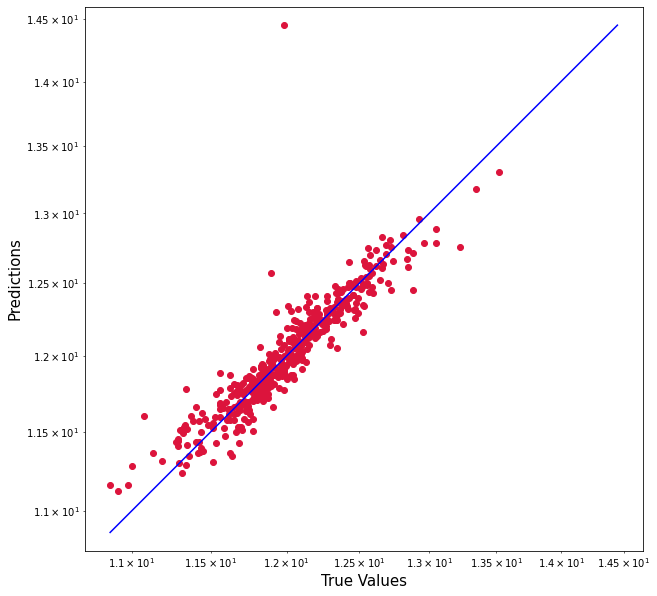

In [372]:
plt.figure(figsize=(10,10))
plt.scatter(y, y_test_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test_pred), max(y))
p2 = min(min(y_test_pred), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

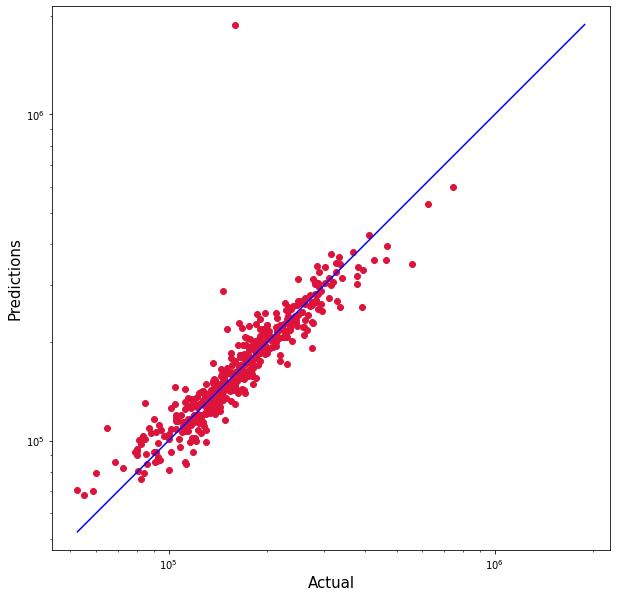

In [373]:
plt.figure(figsize=(10,10))
plt.scatter(Act_SalePrice, Pred_SalePrice, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Pred_SalePrice), max(Act_SalePrice))
p2 = min(min(Pred_SalePrice), min(Act_SalePrice))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [380]:
ridge.coef_[:6]

array([ 1.93459729e-04,  1.87480982e-06,  1.78565330e-02,  3.96165812e-03,
       -2.19613099e-03, -2.10368432e-03])